# **9주차 Ann with Scikit-learn**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

**데이터 분할하기 (train:val = 8:2)**

In [2]:
read = pd.read_csv('/content/drive/MyDrive/머신러닝/9week_mnist/train.csv') #42000, 785
x_train = read.iloc[:33600,1:].values.reshape(33600,784) #33600개의 숫자 데이터
x_val = read.iloc[33600:,1:].values.reshape(8400,784)
y_train = read.iloc[:33600,0].values.reshape(33600,1)
y_val = read.iloc[33600:,0].values.reshape(8400,1)

**Image 샘플 시각화**

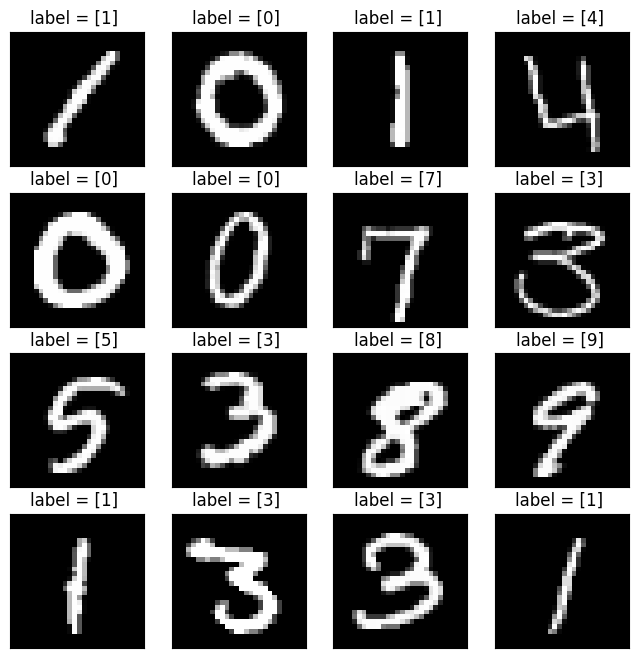

In [3]:
fig, ax = plt.subplots(4,4,figsize=(8,8))
for i in range(4) :
  for j in range(4) :
    index = i * 4 + j
    ax[i, j].imshow(x_train[index].reshape(28,28), cmap = 'gray') #0번째 행을 28*28로 바꿈
    ax[i, j].set_title('label = %s ' % (y_train[index]))
    ax[i, j].set_xticks([]) #x축, y축 눈금 delete
    ax[i, j].set_yticks([])

**Scikit-learn을 이용해서 모델 학습(로지스틱 회귀 활용)**

In [4]:
clf = LogisticRegression(C = 1.0, class_weight = None, dual = False, fit_intercept = True,  #C 규제강도의 역수. 값이 작을 수록 규제가 강해진다. class_weight, 균등 가중치. dual, 듀얼 문제 풀지 않음(false). 절편(bias) 포함 여부
                         intercept_scaling = 1, l1_ratio = None, max_iter = 100, #절편의 스케일링 조절(의미 없음), L1과 L2 비율(의미 없음), 학습 최대 반복 횟수
                         multi_class = 'multinomial', n_jobs = None, penalty = 'l2', #다중 클래스 처리 방식(소프트맥스), 병렬 처리할 작업 수(1개 CPU), 정규화 방식(릿지)
                         random_state = None, solver = 'lbfgs', tol = 0.001, verbose = 0, warm_start = False) #랜덤 시드 고정(재현 가능성 없음), 최적화 알고리즘, 수렴 기준(작으면 학습 종료), 학습 과정 출력(없음), 이전 학습 결과 연결 끊음
clf.fit(x_train, y_train) #학습 실행 (학습 데이터, 정답 레이블)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


KeyboardInterrupt: 

**검증 데이터를 prediction하고 정확도 평가**

In [ ]:
y_val_pred = clf.predict(x_val) #학습된 clf를 이용해 x_val에 대한 예측 결과를 y_val_pred에 넣는다.
print("Model accuracy is %0.3f" % (accuracy_score(y_val, y_val_pred)))
print(y_val[:10].reshape(10)) #y_val 정답 레이블
print(y_val_pred[:10]) #0~10까지 예측 결과

**y_val과 y_val_pred를 1차원으로 만들어 masking 후 bool 비교를 가능하게 한다**

In [ ]:
y_val = y_val.flatten()
y_val_pred = y_val_pred.flatten()

**옳게 분류한 이미지를 시각화**

In [ ]:
x_val_correct = x_val[y_val == y_val_pred] #옳게 분류한 x_val 저장
y_val_correct = y_val[y_val == y_val_pred] #옳게 분류한 y_val 저장
y_val_pred_correct = y_val_pred[y_val == y_val_pred] #옳게 분류한 y_val_pred 저장

fig, ax = plt.subplots(4,4,figsize=(10,10))
for i in range(4) :
  for j in range(4) :
    index = i + j
    ax[i, j].imshow(x_val_correct[index].reshape(28,28), cmap = 'gray') #0번째 행을 28*28로 바꾼 후 시각화
    ax[i, j].set_title('label = %s, pred = %s ' % (y_val_correct[index], y_val_pred_correct[index]))
    ax[i, j].set_xticks([]) #x축, y축 눈금 delete
    ax[i, j].set_yticks([])

**잘 못 분류한 이미지를 시각화**

In [ ]:
x_val_wrong = x_val[y_val != y_val_pred] #잘 못 분류한 x_val 저장
y_val_wrong = y_val[y_val != y_val_pred] #잘 못 분류한 y_val 저장
y_val_pred_wrong = y_val_pred[y_val != y_val_pred] #잘 못 분류한 y_val_pred 저장

fig, ax = plt.subplots(4,4,figsize=(10,10))
for i in range(4) :
  for j in range(4) :
    index = i * 4 + j
    ax[i, j].imshow(x_val_wrong[index].reshape(28,28), cmap = 'gray') #0번째 행을 28*28로 바꾼 후 시각화
    ax[i, j].set_title('label = %s, pred = %s ' % (y_val_wrong[index], y_val_pred_wrong[index]))
    ax[i, j].set_xticks([]) #x축, y축 눈금 delete
    ax[i, j].set_yticks([])

**테스트 데이터를 예측하기**

In [ ]:
read = pd.read_csv('/content/drive/MyDrive/머신러닝/9week_mnist/test.csv') #28000,784
x_test = read.values.reshape(28000,784) #28000개의 숫자 데이터
preds = clf.predict(x_test) #x_test를 학습된 데이터로 예측한다.

**예측값 파일로 내보내기**

In [ ]:
sample_submission = pd.read_csv('/content/drive/MyDrive/머신러닝/9week_mnist/sample_submission.csv')
sample_submission['Label'] = preds
sample_submission.to_csv('/content/drive/MyDrive/머신러닝/9week_mnist/sample_submission.csv', index = False)